In [10]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
# ganache_url = "https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [11]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [12]:
#convert proposal names into bytes32
candidate1 = "0x63616e6469646174653100000000000000000000000000000000000000000000"
candidate2 = "0x63616e6469646174653200000000000000000000000000000000000000000000"


In [13]:
#abi = Contract Application Binary Interface 
abi = json.loads('[ { "inputs": [ { "internalType": "bytes32[]", "name": "proposalNames", "type": "bytes32[]" } ], "stateMutability": "nonpayable", "type": "constructor" }, { "inputs": [], "name": "chairperson", "outputs": [ { "internalType": "address", "name": "", "type": "address" } ], "stateMutability": "view", "type": "function" }, { "inputs": [ { "internalType": "address", "name": "to", "type": "address" } ], "name": "delegate", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "address", "name": "voter", "type": "address" } ], "name": "giveRightToVote", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "uint256", "name": "", "type": "uint256" } ], "name": "proposals", "outputs": [ { "internalType": "bytes32", "name": "name", "type": "bytes32" }, { "internalType": "uint256", "name": "voteCount", "type": "uint256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [ { "internalType": "uint256", "name": "proposal", "type": "uint256" } ], "name": "vote", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "address", "name": "", "type": "address" } ], "name": "voters", "outputs": [ { "internalType": "uint256", "name": "weight", "type": "uint256" }, { "internalType": "bool", "name": "voted", "type": "bool" }, { "internalType": "address", "name": "delegate", "type": "address" }, { "internalType": "uint256", "name": "vote", "type": "uint256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "winnerName", "outputs": [ { "internalType": "bytes32", "name": "winnerName_", "type": "bytes32" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "winningProposal", "outputs": [ { "internalType": "uint256", "name": "winningProposal_", "type": "uint256" } ], "stateMutability": "view", "type": "function" } ]')
cont_address = "0x60B5F6Fdcdd217f02c3bc86675C05BeBC2fAC150"

In [14]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [19]:
accounts = web3.eth.accounts
accounts

['0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300',
 '0x8883f1016E727C8fE93C1Df471f102bBbAF2B910',
 '0xd39fdd79c3b5b0c411366D5A64ba26E423e1cF61',
 '0xc35903FEf5A3c481e5374F8757789b7a926d8167',
 '0x02D1713f69E4bB575cc08Fd1fa0F38FCC77adEA0',
 '0x2e3bADAfAd1e9775980135bDBeDb59C222AA5Ef3',
 '0x5Be0c6823C4A2F2383f7de178A20757CbF372E62',
 '0x184AcdD70119eFbde97B6429AE66122C8D845e33',
 '0x543456141D649b97aa59d221C5aEAF0919C17F1D',
 '0x979b25044F7A02f9aC437a82A2b734Cf3A0e59eB']

In [17]:
def give_right_to_vote(chair,voter):
    nonce = web3.eth.getTransactionCount(chair)
    transaction = contract.functions.sigmoid_act(
        voter
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': chair,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [18]:
n, d = contract.functions.sigprint().call()
print("value of sigmoid is:", n/d)

ZeroDivisionError: division by zero

In [19]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [20]:
a_list = list(range(-100, 101))
a_val_num = np.array(a_list)
a_val_den = np.full(201,10)

In [21]:
sig_b=np.zeros(201)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [22]:
sig_e=np.zeros(201)
gasUse =[]
for i in range(len(a_val_num)):
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

In [23]:
sig_b

array([4.53978687e-05, 5.01721647e-05, 5.54485247e-05, 6.12797396e-05,
       6.77241496e-05, 7.48462275e-05, 8.27172229e-05, 9.14158739e-05,
       1.01029194e-04, 1.11653341e-04, 1.23394576e-04, 1.36370327e-04,
       1.50710358e-04, 1.66558065e-04, 1.84071905e-04, 2.03426978e-04,
       2.24816770e-04, 2.48455082e-04, 2.74578156e-04, 3.03447030e-04,
       3.35350130e-04, 3.70606141e-04, 4.09567165e-04, 4.52622223e-04,
       5.00201107e-04, 5.52778637e-04, 6.10879359e-04, 6.75082731e-04,
       7.46028834e-04, 8.24424686e-04, 9.11051194e-04, 1.00677082e-03,
       1.11253603e-03, 1.22939862e-03, 1.35851995e-03, 1.50118226e-03,
       1.65880108e-03, 1.83293894e-03, 2.02532039e-03, 2.23784852e-03,
       2.47262316e-03, 2.73196076e-03, 3.01841632e-03, 3.33480731e-03,
       3.68423990e-03, 4.07013772e-03, 4.49627316e-03, 4.96680165e-03,
       5.48629890e-03, 6.05980149e-03, 6.69285092e-03, 7.39154134e-03,
       8.16257115e-03, 9.01329865e-03, 9.95180187e-03, 1.09869426e-02,
      

In [24]:
sig_e

array([0.00000000e+00, 7.00000000e-05, 7.00000000e-05, 7.00000000e-05,
       7.00000000e-05, 7.00000000e-05, 7.00000000e-05, 7.00000000e-05,
       7.00000000e-05, 7.00000000e-05, 7.00000000e-05, 2.00000000e-04,
       2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
       2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
       2.00000000e-04, 6.00000000e-04, 6.00000000e-04, 6.00000000e-04,
       6.00000000e-04, 6.00000000e-04, 6.00000000e-04, 6.00000000e-04,
       6.00000000e-04, 6.00000000e-04, 6.00000000e-04, 1.50000000e-03,
       1.50000000e-03, 1.50000000e-03, 1.50000000e-03, 1.50000000e-03,
       1.50000000e-03, 1.50000000e-03, 1.50000000e-03, 1.50000000e-03,
       1.50000000e-03, 2.75852376e-03, 3.04491770e-03, 3.36197746e-03,
       3.71279879e-03, 4.10076713e-03, 4.52959481e-03, 5.00336651e-03,
       5.52659264e-03, 6.10426819e-03, 6.74193090e-03, 7.45218103e-03,
       8.22185966e-03, 9.07307572e-03, 1.00138605e-02, 1.10529526e-02,
      

In [25]:
d = np.arange(-1.0, 1.01, 0.01)
d

array([-1.0000000e+00, -9.9000000e-01, -9.8000000e-01, -9.7000000e-01,
       -9.6000000e-01, -9.5000000e-01, -9.4000000e-01, -9.3000000e-01,
       -9.2000000e-01, -9.1000000e-01, -9.0000000e-01, -8.9000000e-01,
       -8.8000000e-01, -8.7000000e-01, -8.6000000e-01, -8.5000000e-01,
       -8.4000000e-01, -8.3000000e-01, -8.2000000e-01, -8.1000000e-01,
       -8.0000000e-01, -7.9000000e-01, -7.8000000e-01, -7.7000000e-01,
       -7.6000000e-01, -7.5000000e-01, -7.4000000e-01, -7.3000000e-01,
       -7.2000000e-01, -7.1000000e-01, -7.0000000e-01, -6.9000000e-01,
       -6.8000000e-01, -6.7000000e-01, -6.6000000e-01, -6.5000000e-01,
       -6.4000000e-01, -6.3000000e-01, -6.2000000e-01, -6.1000000e-01,
       -6.0000000e-01, -5.9000000e-01, -5.8000000e-01, -5.7000000e-01,
       -5.6000000e-01, -5.5000000e-01, -5.4000000e-01, -5.3000000e-01,
       -5.2000000e-01, -5.1000000e-01, -5.0000000e-01, -4.9000000e-01,
       -4.8000000e-01, -4.7000000e-01, -4.6000000e-01, -4.5000000e-01,
      

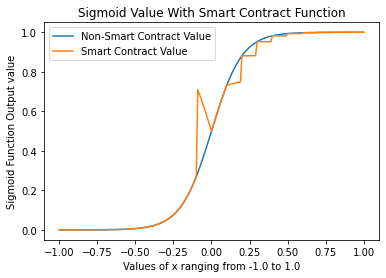

In [26]:
import matplotlib.pyplot as plt
plt.plot(d, sig_b, label = "Non-Smart Contract Value")
plt.plot(d, sig_e, label = "Smart Contract Value")
plt.xlabel("Values of x ranging from -1.0 to 1.0")
plt.ylabel("Sigmoid Function Output value")
plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
# plt.savefig("sigmoid_output.pdf")
plt.show()

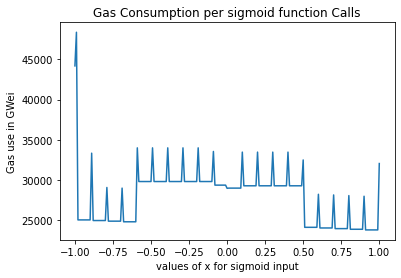

In [27]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei")
plt.xlabel("values of x for sigmoid input")
# plt.savefig("sigmoid_gas.pdf")
plt.show()